### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
import pandas as pd

def analizar_tienda(nombre_tienda, url):
    print(f"\n{nombre_tienda}\n")  # Mostrar título al inicio

    # Cargar datos
    df = pd.read_csv(url)

    # Facturación total por vendedor
    df['Facturación'] = df['Precio'] + df['Costo de envío']
    facturacion = df.groupby('Vendedor')['Facturación'].sum().sort_values(ascending=False)

    # Ventas por categoría
    ventas_categoria = df['Categoría del Producto'].value_counts()

    # Clasificación promedio
    clasificacion = df.groupby('Vendedor')['Calificación'].mean().sort_values(ascending=False)

    # Producto más y menos vendido
    ventas_productos = df['Producto'].value_counts()
    producto_mas_vendido = ventas_productos.idxmax()
    producto_menos_vendido = ventas_productos.idxmin()

    # Resultados
    print(" Facturación total por tienda:\n", facturacion, '\n')
    print(" Ventas por categoría:\n", ventas_categoria, '\n')
    print(" Clasificación promedio por tienda:\n", clasificacion, '\n')
    print(" Producto más vendido:", producto_mas_vendido)
    print("Producto menos vendido:", producto_menos_vendido)

# URLs de cada tienda
tiendas = {
    "TIENDA 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "TIENDA 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "TIENDA 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "TIENDA 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

# Ejecutar análisis para cada tienda
for nombre, url in tiendas.items():
    analizar_tienda(nombre, url)



TIENDA 1

 Facturación total por tienda:
 Vendedor
Maria Alfonso      106844300.0
Rafael Acosta      101399800.0
Izabela de León     98764900.0
Felipe Santos       95048000.0
Juliana Costa       90258700.0
Lucas Olivera       89409500.0
Pedro Gomez         87371500.0
Beatriz Morales     83584500.0
Juan Fernandez      82229100.0
Camila Rivera       79919900.0
Blanca Ramirez      78790100.0
Mariana Herrera     75147200.0
Santiago Silva      73838900.0
Ángel Rodriguez     69651900.0
Name: Facturación, dtype: float64 

 Ventas por categoría:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

 Clasificación promedio por tienda:
 Vendedor
Ángel Rodriguez    4.248521
Rafael Acosta      4.070175
Santiago Silva     4.055556
Felipe Santos      4.0411

In [ ]:
facturacion_total_por_tienda = {}

# Calcular facturación total por tienda
for nombre, url in tiendas.items():
    df = pd.read_csv(url)
    df['Facturación'] = df['Precio'] + df['Costo de envío']
    total = df['Facturación'].sum()
    facturacion_total_por_tienda[nombre] = total
    print(f"{nombre}: ${total:,.2f}")

TIENDA 1: $1,212,258,300.00
TIENDA 2: $1,175,828,600.00
TIENDA 3: $1,156,536,200.00
TIENDA 4: $1,093,693,100.00


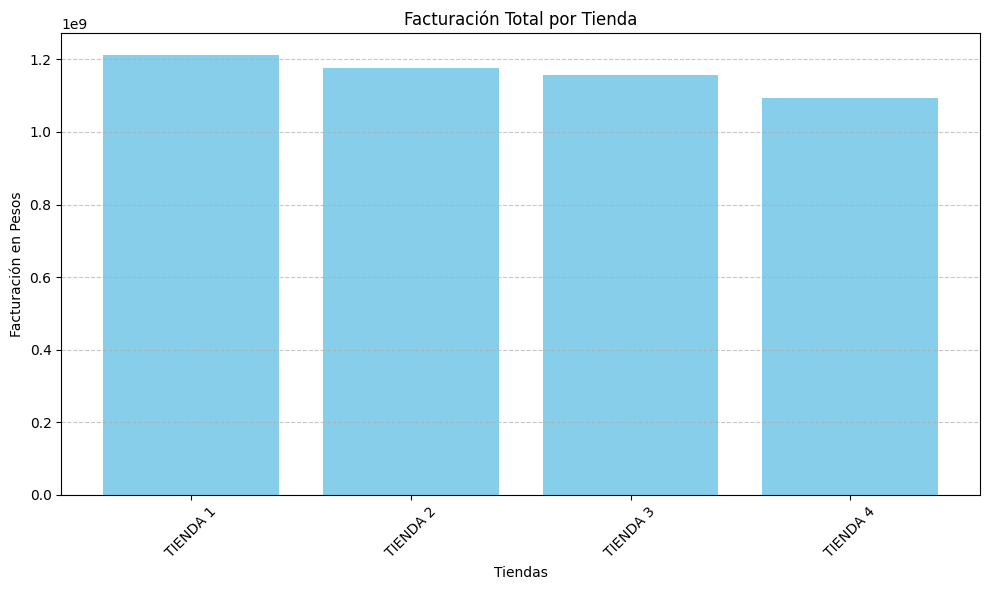

In [ ]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(facturacion_total_por_tienda.keys(), facturacion_total_por_tienda.values(), color='skyblue')
plt.title('Facturación Total por Tienda')
plt.ylabel('Facturación en Pesos')
plt.xlabel('Tiendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Procesar cada tienda
for nombre, url in tiendas.items():
    df = pd.read_csv(url)

    # Calcular ventas por categoría
    ventas_categoria = df['Categoría del Producto'].value_counts()

    # Mostrar en consola
    print(f"\n Ventas por categoría - {nombre}")
    print(ventas_categoria)


 Ventas por categoría - TIENDA 1
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64

 Ventas por categoría - TIENDA 2
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64

 Ventas por categoría - TIENDA 3
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64

 Venta

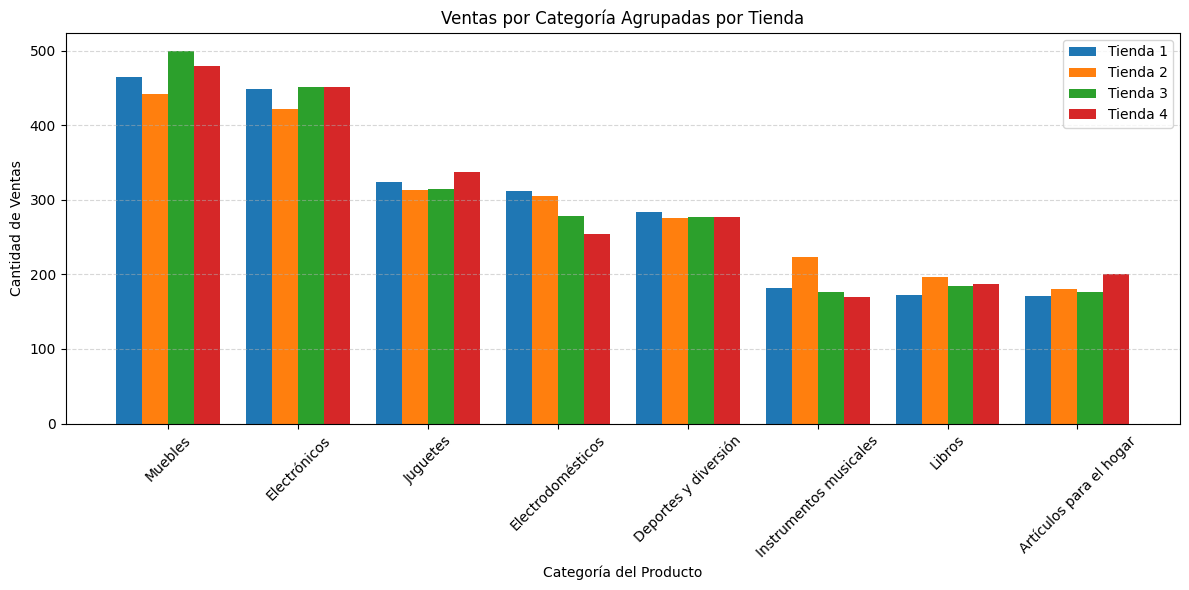

In [ ]:
import numpy as np


# Rellenar valores faltantes con 0
ventas_por_categoria = ventas_por_categoria.fillna(0)

# Gráfica de barras agrupadas
categorias = ventas_por_categoria.index
n_tiendas = len(ventas_por_categoria.columns)
bar_width = 0.2
x = np.arange(len(categorias))

plt.figure(figsize=(12, 6))

# Crear una barra para cada tienda
for i, tienda in enumerate(ventas_por_categoria.columns):
    plt.bar(x + i * bar_width, ventas_por_categoria[tienda], width=bar_width, label=tienda)

# Estética del gráfico
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad de Ventas')
plt.title('Ventas por Categoría Agrupadas por Tienda')
plt.xticks(x + bar_width * (n_tiendas - 1) / 2, categorias, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
clasificaciones_promedio = {}

for tienda, url in urls.items():
    df = pd.read_csv(url)
    # Calcular promedio general de la columna Calificación
    promedio = df['Calificación'].mean()
    clasificaciones_promedio[tienda] = promedio
    print(f"{tienda}: {promedio:.2f}")

Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


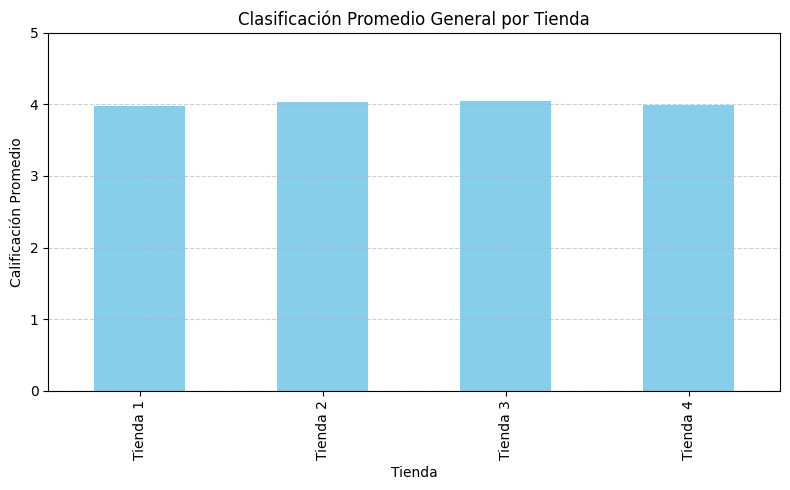

In [ ]:
# Convertir a Series para graficar
clasificaciones_promedio = pd.Series(clasificaciones_promedio)

# Graficar comparación
plt.figure(figsize=(8, 5))
clasificaciones_promedio.plot(kind='bar', color='skyblue')
plt.title('Clasificación Promedio General por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
resultados = []

for tienda, url in urls.items():
    df = pd.read_csv(url)
    ventas_productos = df['Producto'].value_counts()

    producto_mas_vendido = ventas_productos.idxmax()
    cantidad_mas_vendida = ventas_productos.max()

    producto_menos_vendido = ventas_productos.idxmin()
    cantidad_menos_vendida = ventas_productos.min()

    print(f"{tienda}:")
    print(f"  Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendida} unidades)")
    print(f"  Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} unidades)\n")


Tienda 1:
  Producto más vendido: Microondas (60 unidades)
  Producto menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2:
  Producto más vendido: Iniciando en programación (65 unidades)
  Producto menos vendido: Juego de mesa (32 unidades)

Tienda 3:
  Producto más vendido: Kit de bancas (57 unidades)
  Producto menos vendido: Bloques de construcción (35 unidades)

Tienda 4:
  Producto más vendido: Cama box (62 unidades)
  Producto menos vendido: Guitarra eléctrica (33 unidades)



# 5. Envío promedio por tienda

In [ ]:
# Lista para guardar resultados
resultados = []

# Procesar cada tienda
for tienda, url in urls.items():
    df = pd.read_csv(url)

    # Asegurarse de que los datos son numéricos
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    # Calcular el promedio del costo de envío
    envio_promedio = df['Costo de envío'].mean()

    # Guardar resultados
    resultados.append({'Tienda': tienda, 'Envío promedio ($)': round(envio_promedio, 2)})

# Crear DataFrame con resultados
df_envio_promedio = pd.DataFrame(resultados)

# Mostrar
print(df_envio_promedio)

     Tienda  Envío promedio ($)
0  Tienda 1            26018.61
1  Tienda 2            25216.24
2  Tienda 3            24805.68
3  Tienda 4            23459.46


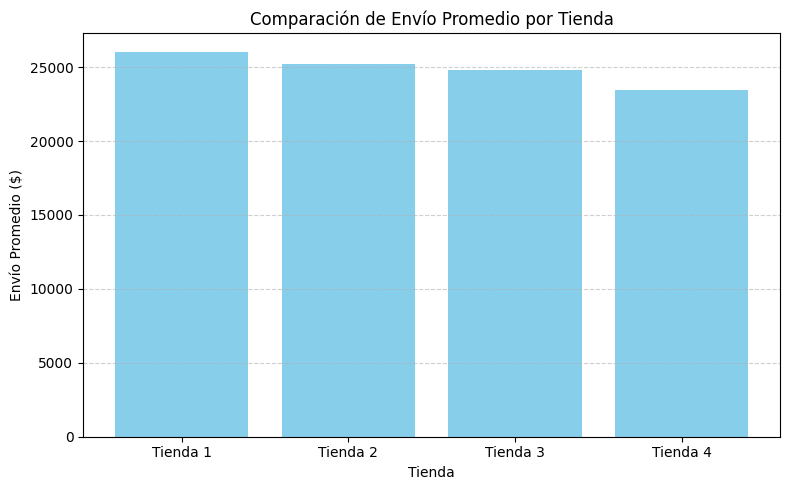

In [ ]:
import matplotlib.pyplot as plt
# Graficar
plt.figure(figsize=(8, 5))
plt.bar(df_envio_promedio['Tienda'], df_envio_promedio['Envío promedio ($)'], color='skyblue')
plt.title('Comparación de Envío Promedio por Tienda')
plt.ylabel('Envío Promedio ($)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#  Recomendación sobre la Rentabilidad de las Tiendas

## Análisis General

Tras analizar los datos de facturación, calificación promedio, ventas por categoría, envíos promedio y productos más y menos vendidos de las cuatro tiendas, se identifican diferencias notables en su desempeño.

##  Tienda menos rentable: *Tienda 4*

### Razones principales:

- **Menor facturación total**: Tienda 4 presenta los ingresos más bajos en comparación con las otras tiendas.
- **Calificación promedio más baja**: Esto sugiere una menor satisfacción de los clientes, lo cual puede impactar negativamente las ventas.
- **Menor diversidad o volumen en ventas por categoría**: Esto limita el alcance a distintos perfiles de clientes.
- **Envío promedio más bajo**: Puede indicar márgenes más ajustados que no compensan el volumen de ventas.
- **Productos con bajo movimiento**: Tiene artículos que se venden muy poco, lo que podría generar acumulación de inventario.


###  Recomendación:

Se sugiere cerrar o reestructurar la operación de la Tienda 4. Algunas acciones estratégicas a considerar:

- Reasignar inventario hacia tiendas con mejor desempeño.
- Fortalecer las estrategias de marketing y ventas locales.
- Revisar el catálogo de productos en función de la demanda.
- Mejorar la experiencia del cliente para elevar la calificación promedio
.

